In [29]:
%matplotlib inline

import pandas as pd
import numpy as np

# Visualization 
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from IPython.core.pylabtools import figsize
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Statistics
import scipy
from scipy import stats
from scipy.stats import percentileofscore

# Clustering analysis
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Linear Regression
from sklearn.linear_model import LinearRegression

# Split data into training/testing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error

# PyMC3 for Bayesian Inference
import pymc3 as pm
from pymc3 import traceplot

In [30]:
import datetime
import time

In [31]:
df501 = pd.read_csv('Data/Node_501.csv', parse_dates=['timestamp'])
df501.head()

,ID,timestamp,temperature,humidity
0,1,09/12/0014 00:03,25.16,36.47
1,2,09/12/0014 00:13,24.83,35.52
2,3,09/12/0014 00:23,24.83,35.68
3,4,09/12/0014 00:33,24.83,35.84
4,5,09/12/0014 00:44,24.83,35.99


In [32]:
df501.insert(2,'latitude','-37.8148084')
df501.insert(3,'longitude','144.980999')
df501.head()

,ID,timestamp,latitude,longitude,temperature,humidity
0,1,09/12/0014 00:03,-37.8148084,144.980999,25.16,36.47
1,2,09/12/0014 00:13,-37.8148084,144.980999,24.83,35.52
2,3,09/12/0014 00:23,-37.8148084,144.980999,24.83,35.68
3,4,09/12/0014 00:33,-37.8148084,144.980999,24.83,35.84
4,5,09/12/0014 00:44,-37.8148084,144.980999,24.83,35.99


In [33]:
df502 = pd.read_csv('Data/Node_502.csv', parse_dates=['timestamp'])
df502.insert(2,'latitude','-37.8146097')
df502.insert(3,'longitude','144.9790177')
df502.head()

,ID,timestamp,latitude,longitude,temperature,humidity
0,1368,09/12/0014 00:01,-37.8146097,144.9790177,23.54,30.63
1,1369,09/12/0014 00:11,-37.8146097,144.9790177,23.54,31.11
2,1370,09/12/0014 00:21,-37.8146097,144.9790177,23.54,30.63
3,1371,09/12/0014 00:32,-37.8146097,144.9790177,23.54,30.79
4,1372,09/12/0014 00:42,-37.8146097,144.9790177,22.90,30.63


In [34]:
df505=pd.read_csv('Data/Node_505.csv', parse_dates=['timestamp'])
df505.insert(2,'latitude','-37.813073')
df505.insert(3,'longitude','144.9804061')
df505.head()

,ID,timestamp,latitude,longitude,temperature,humidity
0,2622,09/12/0014 00:01,-37.813073,144.9804061,23.87,36.15
1,2623,09/12/0014 00:11,-37.813073,144.9804061,23.54,36.62
2,2624,09/12/0014 00:21,-37.813073,144.9804061,23.54,36.15
3,2625,09/12/0014 00:32,-37.813073,144.9804061,23.54,NaN
4,2626,09/12/0014 00:42,-37.813073,144.9804061,23.54,36.31


In [35]:
df507 = pd.read_csv('Data/Node_507.csv', parse_dates=['timestamp'])
df507.insert(2,'latitude','-37.8149218')
df507.insert(3,'longitude','144.9822582')
df507.head()

,ID,timestamp,latitude,longitude,temperature,humidity
0,3990,09/12/0014 00:01,-37.8149218,144.9822582,23.22,36.15
1,3991,09/12/0014 00:11,-37.8149218,144.9822582,22.90,36.31
2,3992,09/12/0014 00:21,-37.8149218,144.9822582,22.58,35.99
3,3993,09/12/0014 00:32,-37.8149218,144.9822582,22.90,NaN
4,3994,09/12/0014 00:42,-37.8149218,144.9822582,22.90,36.15


In [36]:
df508 = pd.read_csv('Data/Node_508.csv', parse_dates=['timestamp'])
df508.insert(2,'latitude','-37.8134078')
df508.insert(3,'longitude','144.9794923')
df508.head()

,ID,timestamp,latitude,longitude,temperature,humidity
0,5353,09/12/0014 00:01,-37.8134078,144.9794923,23.54,36.31
1,5354,09/12/0014 00:12,-37.8134078,144.9794923,23.22,36.15
2,5355,09/12/0014 00:22,-37.8134078,144.9794923,23.54,35.84
3,5356,09/12/0014 00:32,-37.8134078,144.9794923,23.54,NaN
4,5357,09/12/0014 00:42,-37.8134078,144.9794923,23.22,35.99


In [37]:
#Meging the above data frames
df = pd.concat([df501,df502,df505,df507,df508])


In [38]:
df.count()

ID             6583
timestamp      6583
latitude       6583
longitude      6583
temperature    6345
humidity       6321
dtype: int64

In [39]:
df['timestamp'].apply(type)

0       <class 'str'>
1       <class 'str'>
2       <class 'str'>
3       <class 'str'>
4       <class 'str'>
            ...      
1226    <class 'str'>
1227    <class 'str'>
1228    <class 'str'>
1229    <class 'str'>
1230    <class 'str'>
Name: timestamp, Length: 6583, dtype: object

In [40]:
def string_to_time(time_str):
    date, timestamp = time_str.split(' ')
    day, month, year  = list(map(int,date.split('/')))
    hours , minutes = list(map(int,timestamp.split(':')))
    #print(f'day: {day}, month : {month}, year: {year}, hours : {hours}, minutes : {minutes}')
    date_time = datetime.datetime(year+2000, month, day, hours, minutes)
    unix_time = time.mktime(date_time.timetuple())
    return unix_time
    
    

In [41]:
string_to_time("09/12/0014 00:01")

1418063460.0

In [42]:
df['timestamp'] = df['timestamp'].apply(string_to_time)

In [43]:
df['latitude'] = df['latitude'].apply(float)
df['longitude'] = df['longitude'].apply(float)

In [44]:
df.head()

,ID,timestamp,latitude,longitude,temperature,humidity
0,1,1.418064e+09,-37.814808,144.980999,25.16,36.47
1,2,1.418064e+09,-37.814808,144.980999,24.83,35.52
2,3,1.418065e+09,-37.814808,144.980999,24.83,35.68
3,4,1.418065e+09,-37.814808,144.980999,24.83,35.84
4,5,1.418066e+09,-37.814808,144.980999,24.83,35.99


<AxesSubplot:xlabel='ID', ylabel='humidity'>

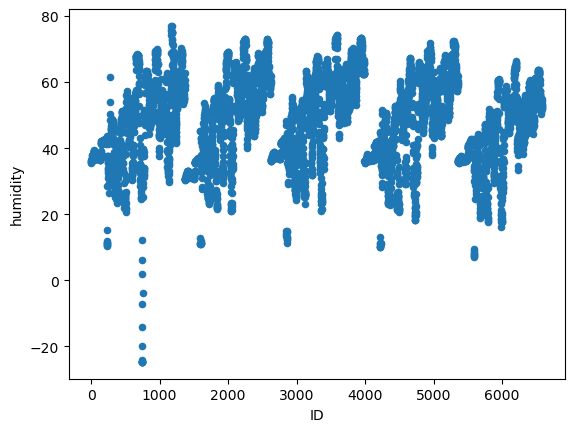

In [45]:
df.plot.scatter('ID','humidity')


In [27]:
gpt_df = df.dropna()

In [48]:
gpt_df[:,].to_csv('sensor_data.csv')

InvalidIndexError: (slice(None, None, None), slice(1, 7, None))

In [19]:
df_copy = df
df_copy.head()


,ID,timestamp,latitude,longitude,temperature,humidity
0,1,1.418064e+09,-37.814808,144.980999,25.16,36.47
1,2,1.418064e+09,-37.814808,144.980999,24.83,35.52
2,3,1.418065e+09,-37.814808,144.980999,24.83,35.68
3,4,1.418065e+09,-37.814808,144.980999,24.83,35.84
4,5,1.418066e+09,-37.814808,144.980999,24.83,35.99


In [20]:
# apply normalization techniques
for column in list(df_copy.columns)[1:6] : 
    df_copy[column] = (df_copy[column] - df_copy[column].min()) / (df_copy[column].max() - df_copy[column].min())
    # view normalized data
    print(df_copy)
    
#df_copy contains the standardized values

        ID  timestamp   latitude   longitude  temperature  humidity
0        1   0.000044 -37.814808  144.980999        25.16     36.47
1        2   0.000266 -37.814808  144.980999        24.83     35.52
2        3   0.000489 -37.814808  144.980999        24.83     35.68
3        4   0.000711 -37.814808  144.980999        24.83     35.84
4        5   0.000955 -37.814808  144.980999        24.83     35.99
...    ...        ...        ...         ...          ...       ...
1226  6579   0.998912 -37.813408  144.979492        16.45     51.92
1227  6580   0.999134 -37.813408  144.979492        16.45     52.07
1228  6581   0.999378 -37.813408  144.979492        16.12     54.75
1229  6582   0.999600 -37.813408  144.979492        16.12     54.12
1230  6583   0.999822 -37.813408  144.979492        16.12     53.18

[6583 rows x 6 columns]
        ID  timestamp  latitude   longitude  temperature  humidity
0        1   0.000044  0.061337  144.980999        25.16     36.47
1        2   0.000266  0.

In [21]:
df['timestamp'].count()

6583

In [22]:
df_copy.count()

ID             6583
timestamp      6583
latitude       6583
longitude      6583
temperature    6345
humidity       6321
dtype: int64

In [150]:
# creatinf a df for temperature outpout
df_temperature = df_copy.copy()
df_temperature['humidity'].interpolate(inplace=True)


In [151]:
df_temperature.head()

,ID,timestamp,latitude,longitude,temperature,humidity
0,1,0.000044,0.061337,0.611418,0.571587,0.601534
1,2,0.000266,0.061337,0.611418,0.559410,0.592192
2,3,0.000489,0.061337,0.611418,0.559410,0.593765
3,4,0.000711,0.061337,0.611418,0.559410,0.595339
4,5,0.000955,0.061337,0.611418,0.559410,0.596814


In [152]:
df_temperature['humidity'].count()

6583

In [165]:
df_temperature.dropna(inplace=True)

In [166]:
df_temperature.count()

ID             6345
timestamp      6345
latitude       6345
longitude      6345
temperature    6345
humidity       6345
dtype: int64

In [167]:
df_temperature_test = df_copy[df_copy['temperature'].isna()]

In [168]:
df_temperature_test.head()

,ID,timestamp,latitude,longitude,temperature,humidity
19,20,0.004375,0.061337,0.611418,NaN,0.616973
118,119,0.026937,0.061337,0.611418,NaN,0.607729
148,149,0.044281,0.061337,0.611418,NaN,0.652670
154,155,0.045657,0.061337,0.611418,NaN,0.649523
162,163,0.047478,0.061337,0.611418,NaN,0.652670


In [169]:
df_temperature_test.count()

ID             238
timestamp      238
latitude       238
longitude      238
temperature      0
humidity       238
dtype: int64

In [170]:
# creatinf a df for temperature outpout
df_humidity = df_copy.copy()
df_humidity['temperature'].interpolate(inplace=True)
df_humidity.head()

,ID,timestamp,latitude,longitude,temperature,humidity
0,1,0.000044,0.061337,0.611418,0.571587,0.601534
1,2,0.000266,0.061337,0.611418,0.559410,0.592192
2,3,0.000489,0.061337,0.611418,0.559410,0.593765
3,4,0.000711,0.061337,0.611418,0.559410,0.595339
4,5,0.000955,0.061337,0.611418,0.559410,0.596814


In [171]:
df_humidity['temperature'].count()

6583

In [172]:
df_humidity.dropna(inplace=True)

In [173]:
df_humidity.count()

ID             6321
timestamp      6321
latitude       6321
longitude      6321
temperature    6321
humidity       6321
dtype: int64

In [174]:
df_humidity_test = df_copy[df_copy['humidity'].isna()]

In [176]:
df_humidity_test.head()

,ID,timestamp,latitude,longitude,temperature,humidity
55,56,0.012569,0.061337,0.611418,0.523985,NaN
66,67,0.015079,0.061337,0.611418,0.511808,NaN
96,97,0.021918,0.061337,0.611418,0.488192,NaN
165,166,0.048167,0.061337,0.611418,0.523985,NaN
193,194,0.054540,0.061337,0.611418,0.500000,NaN


In [177]:
df_humidity_test.count()

ID             262
timestamp      262
latitude       262
longitude      262
temperature    262
humidity         0
dtype: int64

In [189]:
import scipy as sp
from sklearn.preprocessing import PolynomialFeatures, StandardScaler


In [191]:
import pymc3 as pm

In [194]:
df_temperature.head()

,ID,timestamp,latitude,longitude,temperature,humidity
0,1,0.000044,0.061337,0.611418,0.571587,0.601534
1,2,0.000266,0.061337,0.611418,0.559410,0.592192
2,3,0.000489,0.061337,0.611418,0.559410,0.593765
3,4,0.000711,0.061337,0.611418,0.559410,0.595339
4,5,0.000955,0.061337,0.611418,0.559410,0.596814


In [195]:
df_temperature.count()


ID             6345
timestamp      6345
latitude       6345
longitude      6345
temperature    6345
humidity       6345
dtype: int64

In [181]:
# training for the temperature data
x_temperature = df_temperature.drop('temperature',axis=1)

In [182]:
x_temperature.head()

,ID,timestamp,latitude,longitude,humidity
0,1,0.000044,0.061337,0.611418,0.601534
1,2,0.000266,0.061337,0.611418,0.592192
2,3,0.000489,0.061337,0.611418,0.593765
3,4,0.000711,0.061337,0.611418,0.595339
4,5,0.000955,0.061337,0.611418,0.596814


In [183]:
y_temperature = df_temperature['temperature']

In [184]:
y_temperature.head()

0    0.571587
1    0.559410
2    0.559410
3    0.559410
4    0.559410
Name: temperature, dtype: float64

In [185]:
x_temperature.to_numpy()

array([[1.00000000e+00, 4.44138482e-05, 6.13370835e-02, 6.11417991e-01,
        6.01534074e-01],
       [2.00000000e+00, 2.66483089e-04, 6.13370835e-02, 6.11417991e-01,
        5.92191956e-01],
       [3.00000000e+00, 4.88552331e-04, 6.13370835e-02, 6.11417991e-01,
        5.93765365e-01],
       ...,
       [6.58100000e+03, 9.99378206e-01, 8.18909563e-01, 1.46458880e-01,
        7.81296096e-01],
       [6.58200000e+03, 9.99600275e-01, 8.18909563e-01, 1.46458880e-01,
        7.75100797e-01],
       [6.58300000e+03, 9.99822345e-01, 8.18909563e-01, 1.46458880e-01,
        7.65857016e-01]])

In [186]:
np.shape(x_temperature)

(6345, 5)

In [187]:
y_temperature.to_numpy()

array([0.57158672, 0.55940959, 0.55940959, ..., 0.23800738, 0.23800738,
       0.23800738])

In [188]:
np.shape(y_temperature)

(6345,)

In [198]:
formula = 'temperature ~ timestamp + latitude + longitude + humidity'

with pm.Model() as normal_model:
    family = pm.glm.families.Normal()
    pm.GLM.from_formula(formula,data = df_temperature, family = family)
    
    normal_trace = pm.sample(return_inferencedata= True)

The glm module is deprecated and will be removed in version 4.0
We recommend to instead use Bambi https://bambinos.github.io/bambi/
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
/Users/inavin/opt/anaconda3/lib/python3.9/site-packages/theano/tensor/elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
/Users/inavin/opt/anaconda3/lib/python3.9/site-packages/theano/tensor/elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sd, humidity, longitude, latitude, timestamp, Intercept]
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.bl

/Users/inavin/opt/anaconda3/lib/python3.9/site-packages/theano/scalar/basic.py:3167: RuntimeWarning: overflow encountered in double_scalars
  return x * x
/Users/inavin/opt/anaconda3/lib/python3.9/site-packages/theano/tensor/elemwise.py:826: RuntimeWarning: overflow encountered in impl (vectorized)
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
/Users/inavin/opt/anaconda3/lib/python3.9/site-packages/theano/scalar/basic.py:2893: RuntimeWarning: divide by zero encountered in log
  return np.log(x)
/Users/inavin/opt/anaconda3/lib/python3.9/site-packages/theano/tensor/elemwise.py:826: RuntimeWarning: divide by zero encountered in impl (vectorized)
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
/Users/inavin/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Users/inavin/opt/anaconda3/lib/python3.9/site-packages/theano/scalar/basic.py:1955: RuntimeWarning: inva

ValueError: Not enough samples to build a trace.